## Intelligent Systems - HW2
### Soroush Mesforush Mashhad
#### SID: 810198472

### Question 3

Here we load the wine dataset

In [171]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
import os
import operator
import metric_learn
import math
from scipy.spatial import distance_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

### K Nearest Neighbor classifier

#### Part A : Classifier Design

For Brevity, we shall split the program into some functions.

In [2]:
def Distance(x1,x2):
    return distance_matrix(x1, x2)

In [121]:
def KNearestNeighbors(K,train_data,test_data):
    #we need to find the closest neighbors hence we need an array
    distance = []
    distance = Distance(train_data,test_data)
    #Now we need the indices of the minimum distances to choose the neighbors
    Minindices = distance.argsort(axis=0)
    neighbors = np.zeros(len(distance))
    neighbors = train_data[Minindices]
    #We must choose the first k ones as the final neighbors
    neighbors = neighbors[0:K,:]
    Minindices = Minindices[0:K,:]
    return neighbors,Minindices

In [120]:
def Predict(K,train_data, test_data,train_labels):
    Classification=list()
    Neighbors,NeighborIndices = KNearestNeighbors(K,train_data, test_data)
    counter1 = 0
    NeighborLabels = train_labels[NeighborIndices]
    while(counter1<NeighborIndices.shape[1]):
        counter2 = 0
        Temp = list()
        while(counter2<NeighborIndices.shape[0]):
            Temp.append(train_labels[NeighborIndices[counter2][counter1]])
            counter2 +=1
        Classification.append(max(Temp,key = Temp.count))
        counter1 +=1
    Classification = np.array(Classification)
    return Classification,NeighborLabels

In [5]:
def Accuracy (Real,Pred):
    counter = 0
    for i in range(len(Real)):
        if Real[i]==Pred[i]:
            counter+=1
    return counter/len(Real)

In [6]:
from sklearn.datasets import load_wine
wine = load_wine()

In [7]:
data = wine.data #data
label = wine.target #label
print(np.shape(data))
print(np.shape(label))
wine.target_names

(178, 13)
(178,)


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Here we shall split the data into train and test data (80 to 20 percent)

In [123]:
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(wine.data, wine.target, test_size=0.2,random_state=0)
Pred1,NeighborLabel1=Predict(1,train_data, test_data,train_labels)
Pred5,NeighborLabel5=Predict(5,train_data, test_data,train_labels)
Pred10,NeighborLabel10=Predict(10,train_data, test_data,train_labels)
Pred20,NeighborLabel20=Predict(20,train_data, test_data,train_labels)
Acc1 = Accuracy(Pred1,test_labels)
print("Acc1:",Acc1)
Acc5 = Accuracy(Pred5,test_labels)
print("Acc5:",Acc5)
Acc10 = Accuracy(Pred10,test_labels)
print("Acc10:",Acc10)
Acc20 = Accuracy(Pred20,test_labels)
print("Acc20:",Acc20)
Listfor1 = []
Listfor5 = []
Listfor10 = []
Listfor20 = []
NeighborLabel1 = NeighborLabel1.T
NeighborLabel5 = NeighborLabel5.T
NeighborLabel10 = NeighborLabel10.T
NeighborLabel20 = NeighborLabel20.T

for i in range(len(test_labels)):
    Listfor1.append(list(NeighborLabel1[i]).count(Pred1[i])/1)
    Listfor5.append(list(NeighborLabel5[i]).count(Pred5[i])/5)
    Listfor10.append(list(NeighborLabel10[i]).count(Pred10[i])/10)
    Listfor20.append(list(NeighborLabel20[i]).count(Pred20[i])/20)

Acc1: 0.7777777777777778
Acc5: 0.8333333333333334
Acc10: 0.75
Acc20: 0.7777777777777778


Now we go on to the confusion matrix

In [11]:
def CMatrix(Pred,Real):
    #First we must find the classes, i.e: 0 1 2
    Cls = np.unique(Real)
    Len  = len(Cls)
    #We know that the confusion matrix is always a square matrix hence
    Cm = np.zeros((Len,Len))
    for i in range (Len):
        for j in range(Len):
            Cm[i][j] = np.sum((Real == Cls[i]) & (Pred == Cls[j]))
    return Cm

Now we shall plot the confusion matrix for the different cases.

#### K = 1

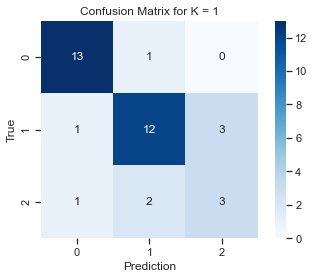

In [124]:
Cmat1 = CMatrix(Pred1,test_labels)
ax = sn.heatmap(Cmat1,cmap="Blues" ,annot=True,square = True)
plt.title('Confusion Matrix for K = 1')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

##### K = 5

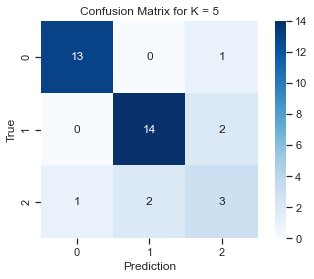

In [129]:
Cmat5 = CMatrix(Pred5,test_labels)
ax = sn.heatmap(Cmat5,cmap="Blues" ,annot=True,square = True)
plt.title('Confusion Matrix for K = 5')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

##### K = 10

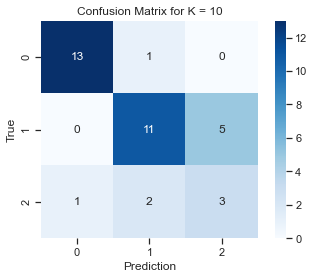

In [126]:
Cmat10 = CMatrix(Pred10,test_labels)
ax = sn.heatmap(Cmat10,cmap="Blues" ,annot=True,square = True)
plt.title('Confusion Matrix for K = 10')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

##### K =  20

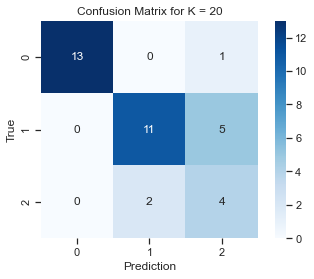

In [128]:
Cmat20 = CMatrix(Pred20,test_labels)
ax = sn.heatmap(Cmat20,cmap="Blues" ,annot=True,square = True)
plt.title('Confusion Matrix for K = 20')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

Now we shall go on to plot the probability distribution for each class.

#### K  = 1

[Text(0.5, 1.0, 'Probability of being chosen for k = 1')]

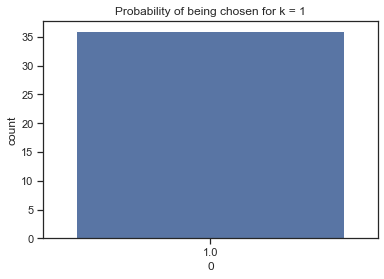

In [144]:
df = pd.DataFrame(Listfor1)
sn.set(style="ticks")
sn.countplot(x =0,data = df).set(title='Probability of being chosen for k = 1')

##### K = 5

[Text(0.5, 1.0, 'Probability of being chosen for k = 5')]

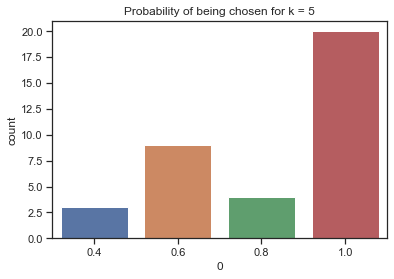

In [148]:
df = pd.DataFrame(Listfor5)
sn.countplot(x=0,data = df).set(title='Probability of being chosen for k = 5')

##### K = 10

[Text(0.5, 1.0, 'Probability of being chosen for k = 10')]

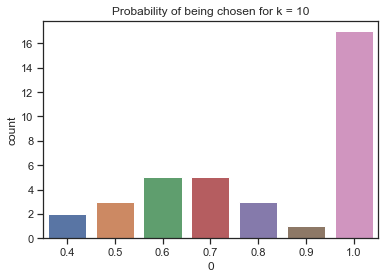

In [149]:
df = pd.DataFrame(Listfor10)
sn.countplot(x=0,data = df).set(title='Probability of being chosen for k = 10')

##### K = 20

[Text(0.5, 1.0, 'Probability of being chosen for k = 20')]

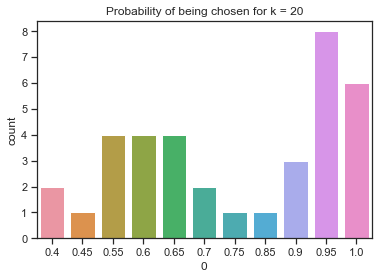

In [150]:
df = pd.DataFrame(Listfor20)
sn.countplot(x=0,data = df).set(title='Probability of being chosen for k = 20')

### Part 2

In [20]:
from sklearn.datasets import load_wine
wine = load_wine()

In [21]:
data = wine.data #data
label = wine.target #label
print(np.shape(data))
print(np.shape(label))
wine.target_names


(178, 13)
(178,)


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Here we shall use PCA on the train data

In [245]:
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(wine.data, wine.target, test_size=0.2,random_state=0)

In [246]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
PCAData = pca.fit_transform(train_data)
PCATest = pca.transform(test_data)
print(np.shape(PCAData))
print(np.shape(PCATest))

(142, 2)
(36, 2)


In [247]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(PCAData, train_labels)
Pred1 = knn1.predict(PCAData)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(PCAData, train_labels)
Pred5 = knn5.predict(PCAData)

knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(PCAData, train_labels)
Pred15 = knn15.predict(PCAData)


#Now for the test data.

knn1t = KNeighborsClassifier(n_neighbors=1)
knn1t.fit(PCAData, train_labels)
Pred1t = knn1t.predict(PCATest)

knn5t = KNeighborsClassifier(n_neighbors=5)
knn5t.fit(PCAData, train_labels)
Pred5t = knn5t.predict(PCATest)

knn15t = KNeighborsClassifier(n_neighbors=15)
knn15t.fit(PCAData, train_labels)
Pred15t = knn15t.predict(PCATest)

In [249]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy1train:",metrics.accuracy_score(train_labels, Pred1))
print("Accuracy5train:",metrics.accuracy_score(train_labels, Pred5))
print("Accuracy15train:",metrics.accuracy_score(train_labels, Pred15))
print("Accuracy1test:",metrics.accuracy_score(test_labels, Pred1t))
print("Accuracy5test:",metrics.accuracy_score(test_labels, Pred5t))
print("Accuracy15test:",metrics.accuracy_score(test_labels, Pred15t))

Accuracy1train: 1.0
Accuracy5train: 0.7816901408450704
Accuracy15train: 0.7535211267605634
Accuracy1test: 0.75
Accuracy5test: 0.75
Accuracy15test: 0.7222222222222222


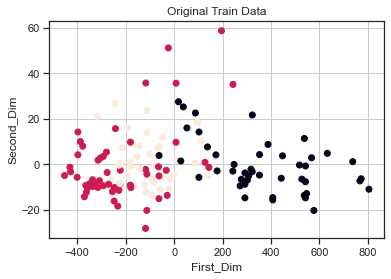

In [250]:
plt.scatter(PCAData[:,0],PCAData[:,1],c =train_labels)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Original Train Data')
plt.grid()

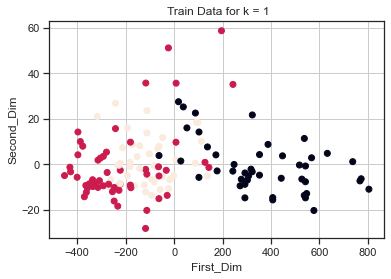

In [251]:
plt.scatter(PCAData[:,0],PCAData[:,1],c =Pred1)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Train Data for k = 1')
plt.grid()

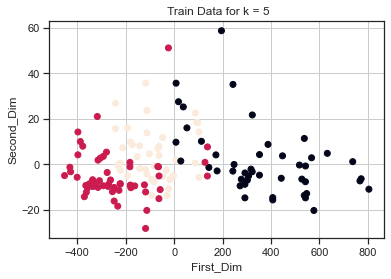

In [252]:
plt.scatter(PCAData[:,0],PCAData[:,1],c = Pred5)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Train Data for k = 5')
plt.grid()

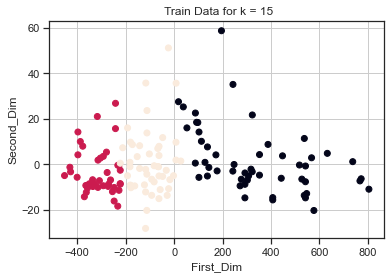

In [253]:
plt.scatter(PCAData[:,0],PCAData[:,1],c = Pred15)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Train Data for k = 15')
plt.grid()

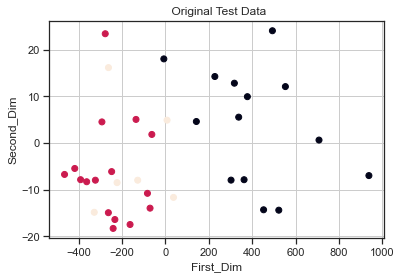

In [254]:
plt.scatter(PCATest[:,0],PCATest[:,1],c =test_labels)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Original Test Data')
plt.grid()

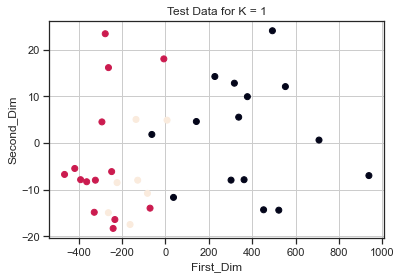

In [255]:
plt.scatter(PCATest[:,0],PCATest[:,1],c =Pred1t)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 1')
plt.grid()

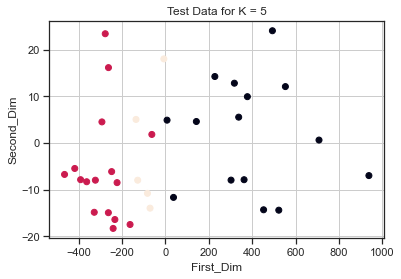

In [256]:
plt.scatter(PCATest[:,0],PCATest[:,1],c =Pred5t)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 5')
plt.grid()

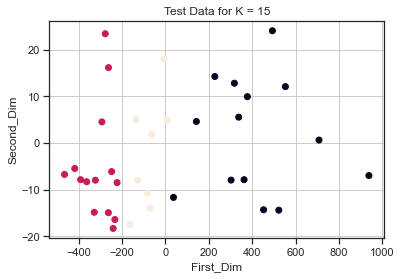

In [257]:
plt.scatter(PCATest[:,0],PCATest[:,1],c =Pred15t)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 15')
plt.grid()

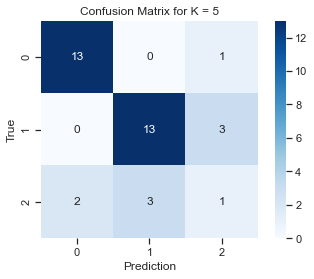

In [258]:
Cmat5 = CMatrix(Pred5t,test_labels)
ax = sn.heatmap(Cmat5,cmap="Blues" ,annot=True,square = True)
plt.title('Confusion Matrix for K = 5')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

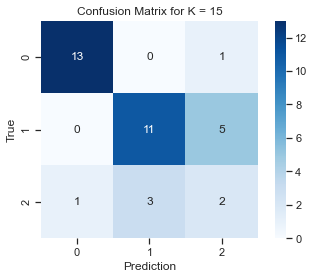

In [259]:
Cmat15 = CMatrix(Pred15t,test_labels)
ax = sn.heatmap(Cmat15,cmap="Blues" ,annot=True,square = True)
plt.title('Confusion Matrix for K = 15')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

Now we shall do all of the following for LMNN and LFDA

##### LFDA

In [260]:
from metric_learn import LFDA
ndim = 2
lfda = LFDA(ndim)
lfda.fit(wine.data, wine.target)
LFDAtraindata = lfda.transform(train_data)
LFDAtestdata = lfda.transform(test_data)
print(LFDAtraindata.shape)
print(LFDAtestdata.shape)

(142, 2)
(36, 2)


In [261]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(LFDAtraindata, train_labels)
Pred1 = knn1.predict(LFDAtraindata)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(LFDAtraindata, train_labels)
Pred5 = knn5.predict(LFDAtraindata)

knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(LFDAtraindata, train_labels)
Pred15 = knn15.predict(LFDAtraindata)

#Now for the test data.

knn1t = KNeighborsClassifier(n_neighbors=1)
knn1t.fit(LFDAtraindata, train_labels)
Pred1t = knn1t.predict(LFDAtestdata)

knn5t = KNeighborsClassifier(n_neighbors=5)
knn5t.fit(LFDAtraindata, train_labels)
Pred5t = knn5t.predict(LFDAtestdata)

knn15t = KNeighborsClassifier(n_neighbors=15)
knn15t.fit(LFDAtraindata, train_labels)
Pred15t = knn15t.predict(LFDAtestdata)

In [262]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy1trainLFDA:",metrics.accuracy_score(train_labels, Pred1))
print("Accuracy5trainLFDA:",metrics.accuracy_score(train_labels, Pred5))
print("Accuracy15trainLFDA:",metrics.accuracy_score(train_labels, Pred15))
print("Accuracy1testLFDA:",metrics.accuracy_score(test_labels, Pred1t))
print("Accuracy5testLFDA:",metrics.accuracy_score(test_labels, Pred5t))
print("Accuracy15testLFDA:",metrics.accuracy_score(test_labels, Pred15t))

Accuracy1trainLFDA: 1.0
Accuracy5trainLFDA: 0.971830985915493
Accuracy15trainLFDA: 0.9788732394366197
Accuracy1testLFDA: 0.9722222222222222
Accuracy5testLFDA: 1.0
Accuracy15testLFDA: 0.9444444444444444


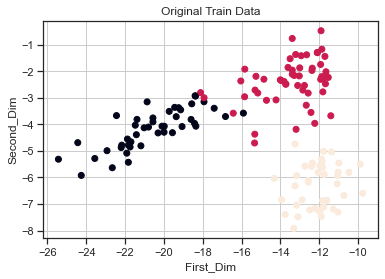

In [263]:
plt.scatter(LFDAtraindata[:,0],LFDAtraindata[:,1],c =train_labels)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Original Train Data')
plt.grid()

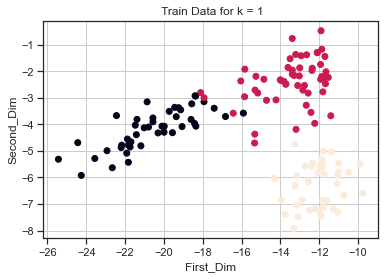

In [188]:
plt.scatter(LFDAtraindata[:,0],LFDAtraindata[:,1],c =Pred1)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Train Data for k = 1')
plt.grid()

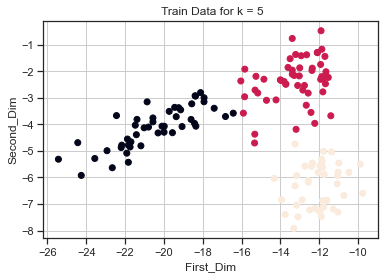

In [189]:
plt.scatter(LFDAtraindata[:,0],LFDAtraindata[:,1],c =Pred5)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Train Data for k = 5')
plt.grid()

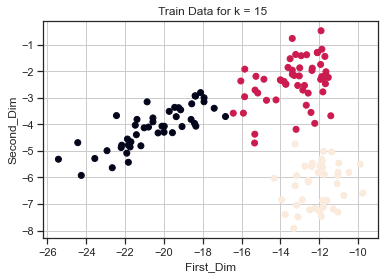

In [190]:
plt.scatter(LFDAtraindata[:,0],LFDAtraindata[:,1],c =Pred15)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Train Data for k = 15')
plt.grid()

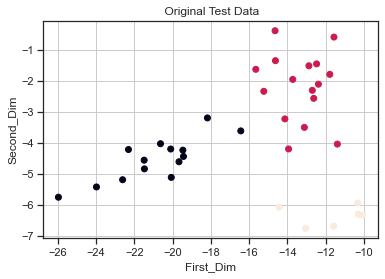

In [191]:
plt.scatter(LFDAtestdata[:,0],LFDAtestdata[:,1],c =test_labels)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title(' Original Test Data')
plt.grid()

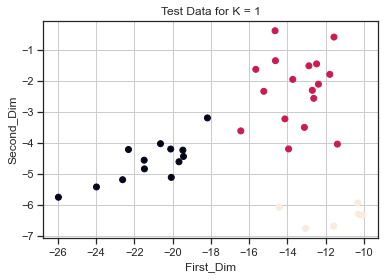

In [192]:
plt.scatter(LFDAtestdata[:,0],LFDAtestdata[:,1],c =Pred1t)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 1')
plt.grid()

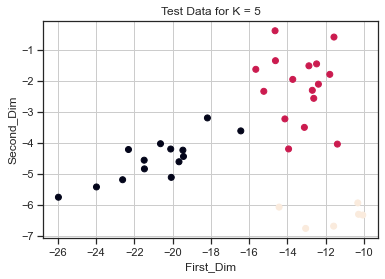

In [193]:
plt.scatter(LFDAtestdata[:,0],LFDAtestdata[:,1],c =Pred5t)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 5')
plt.grid()

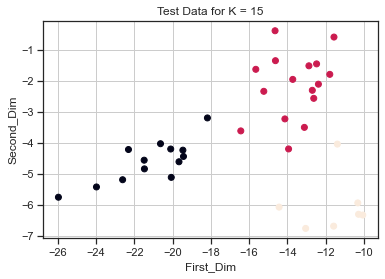

In [194]:
plt.scatter(LFDAtestdata[:,0],LFDAtestdata[:,1],c =Pred15t)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 15')
plt.grid()

###### LMNN

In [278]:
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(wine.data, wine.target, test_size=0.2,random_state=0)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
PCAData = pca.fit_transform(train_data)
PCATest = pca.transform(test_data)
print(np.shape(PCAData))
print(np.shape(PCATest))

(142, 2)
(36, 2)


In [284]:
from metric_learn import LMNN
X = PCAData
X2 = PCATest
Y = train_labels
Y2 = test_labels
lmnntr1 = metric_learn.LMNN(k=1, learn_rate=1e-6)
lmnnte1 = metric_learn.LMNN(k=1, learn_rate=1e-6)
# fit the data!
lmnntr1.fit(X, Y)
knntr1 = KNeighborsClassifier(n_neighbors = 1)
knntr1.fit(lmnntr1.transform(X),Y)
Predtr1 = knntr1.predict(lmnntr1.transform(X))
print("Accuracy1trainLMNN:",metrics.accuracy_score(train_labels, Predtr1))
lmnnte1.fit(X2, Y2)
knnte1 = KNeighborsClassifier(n_neighbors = 1)
knnte1.fit(lmnnte1.transform(X2),Y2)
Predte1 = knnte1.predict(lmnnte1.transform(X2))
print("Accuracy1testLMNN:",metrics.accuracy_score(test_labels, Predte1))

Accuracy1trainLMNN: 1.0
Accuracy1testLMNN: 1.0


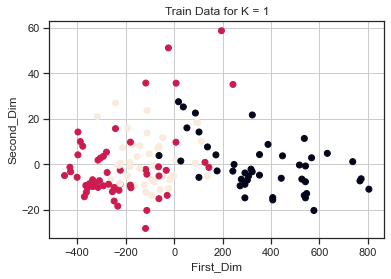

In [298]:
plt.scatter(X[:,0],X[:,1],c =Predtr1 )
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Train Data for K = 1')
plt.grid()

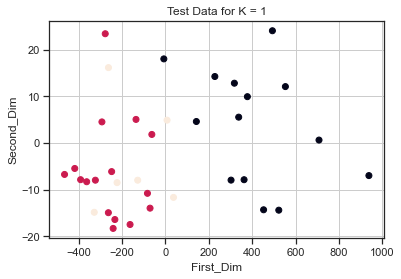

In [299]:
plt.scatter(X2[:,0],X2[:,1],c = Predte1)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 1')
plt.grid()

In [291]:
from metric_learn import LMNN
X = PCAData
X2 = PCATest
Y = train_labels
Y2 = test_labels
lmnntr5 = metric_learn.LMNN(k=5, learn_rate=1e-6)
lmnnte5 = metric_learn.LMNN(k=5, learn_rate=1e-6)
# fit the data!
lmnntr5.fit(X, Y)
knntr5 = KNeighborsClassifier(n_neighbors = 5)
knntr5.fit(lmnntr5.transform(X),Y)
Predtr5 = knntr5.predict(lmnntr5.transform(X))
print("Accuracy5trainLMNN:",metrics.accuracy_score(train_labels, Predtr5))
lmnnte5.fit(X2, Y2)
knnte5 = KNeighborsClassifier(n_neighbors = 5)
knnte5.fit(lmnnte5.transform(X2),Y2)
Predte5 = knnte5.predict(lmnnte1.transform(X2))
print("Accuracy5testLMNN:",metrics.accuracy_score(test_labels, Predte5))

Accuracy5trainLMNN: 0.7887323943661971
Accuracy5testLMNN: 0.8055555555555556


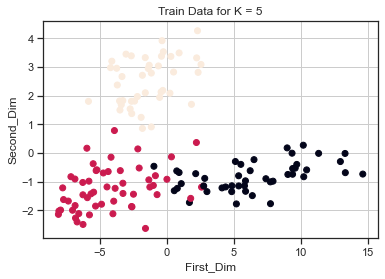

In [226]:
plt.scatter(X[:,0],X[:,1],c = Predtr5)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Train Data for K = 5')
plt.grid()

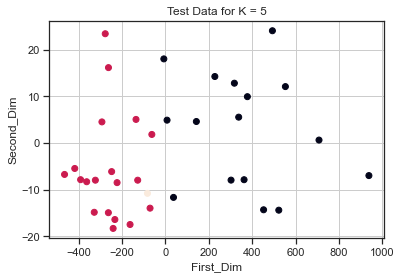

In [300]:
plt.scatter(X2[:,0],X2[:,1],c = Predte5)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Test Data for K = 5')
plt.grid()

In [297]:
from metric_learn import LMNN
X = PCAData
X2 = PCATest
Y = train_labels
Y2 = test_labels
lmnntr15 = metric_learn.LMNN(k=15, learn_rate=1e-6)
#lmnnte15 = metric_learn.LMNN(k=15, learn_rate=1e-6)
# fit the data!
lmnntr15.fit(X, Y)
knntr15 = KNeighborsClassifier(n_neighbors = 15)
knntr15.fit(lmnntr15.transform(X),Y)
Predtr15 = knntr15.predict(lmnntr5.transform(X))
print("Accuracy15trainLMNN:",metrics.accuracy_score(train_labels, Predtr15))

Accuracy15trainLMNN: 0.7253521126760564


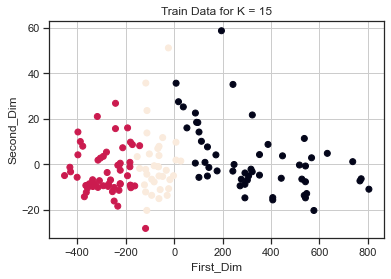

In [301]:
plt.scatter(X[:,0],X[:,1],c = Predtr15)
plt.xlabel('First_Dim')
plt.ylabel('Second_Dim')
plt.title('Train Data for K = 15')
plt.grid()

##### Part D :Correlation Coefficient

In [304]:
#The Original Corr Matrix
df = pd.DataFrame(data = wine.data,columns = wine.feature_names)
corr = df.corr()
corr.style.background_gradient(cmap='YlOrRd')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [306]:
#CoeffForPCA
df = pd.DataFrame(data = PCAData)
corr = df.corr()
corr.style.background_gradient(cmap='YlOrRd')

,0,1
0,1.000000,0.000000
1,0.000000,1.000000


In [307]:
#CorrForLFDA
df = pd.DataFrame(data = LFDAtraindata)
corr = df.corr()
corr.style.background_gradient(cmap='YlOrRd')

,0,1
0,1.000000,-0.026416
1,-0.026416,1.000000


In [308]:
#CorrForLMNN
df = pd.DataFrame(data = lmnntr1.transform(X))
corr = df.corr()
corr.style.background_gradient(cmap='YlOrRd')


,0,1
0,1.000000,0.730804
1,0.730804,1.000000
